# Customer Analytics Segmentation


In [1]:
import pandas as pd
import numpy as np 
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [2]:
# Loading The Data
df_segmentation = pd.read_csv('D://z/segmentation data.csv',index_col = 0)

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [10]:
df_segmentation.shape

(2000, 7)

In [11]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [9]:
df_segmentation.isnull().any()

Sex                False
Marital status     False
Age                False
Education          False
Income             False
Occupation         False
Settlement size    False
dtype: bool

### Correlation Estimate

In [12]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


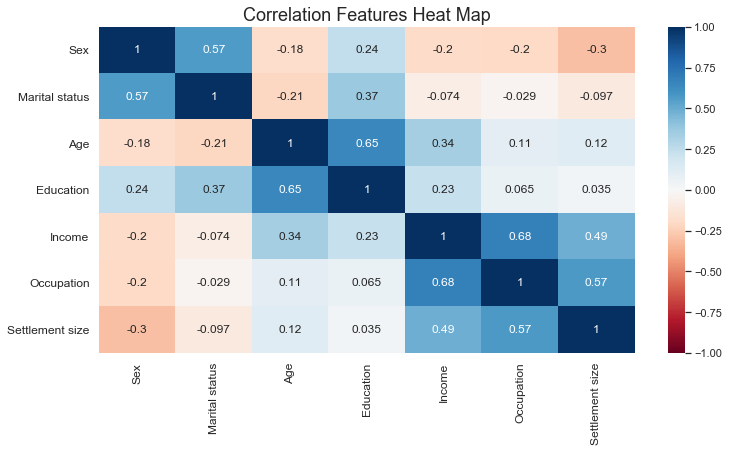

In [13]:
plt.figure(figsize=(12,6))
s = sns.heatmap(df_segmentation.corr(),annot=True,vmin=-1,vmax=1,cmap='RdBu')
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize = 12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize = 12)
plt.title('Correlation Features Heat Map',fontsize=18);

#### We can see from the features correlation that (Income&Occupation) have a strong positive linear relationship which is make sense as well as (Age & Education) and (Occupation & Settlemements Size), (Marital Status & Sex)

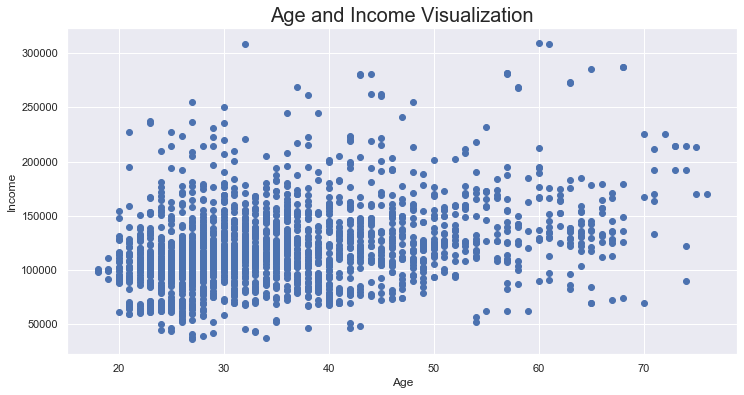

In [4]:
plt.figure(figsize=(12,6))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age and Income Visualization',fontsize=20);

#### Obviously from this scatter plot as the age increases the incom tend to increase as well 

# Standardization


In [5]:
scaler = StandardScaler()

In [6]:
segmentation_strd = scaler.fit_transform(df_segmentation)

## 1st-Model..Hirarchical Clustring

In [7]:
hier_cluster = linkage(segmentation_strd,method='ward') 

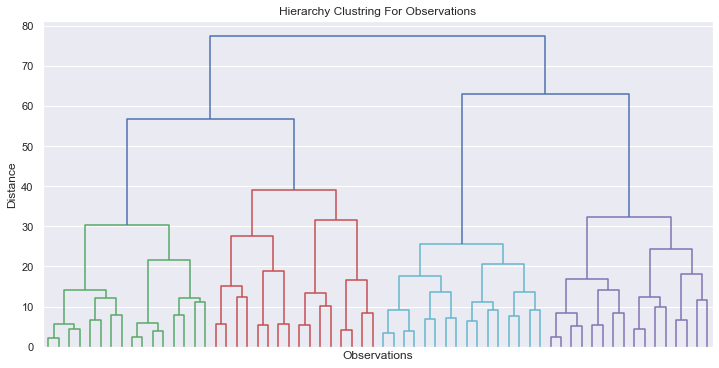

In [8]:
plt.figure(figsize=(12,6))
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.title('Hierarchy Clustring For Observations')
dendrogram(hier_cluster,show_leaf_counts = False
           ,no_labels=True,truncate_mode = 'level',p=5);

### Here the linkage done it for us the cut process and categorize the clusters

## K-means Clustring

In [9]:
# starting with 10 clusters and fit k means clustering to the data
wcss = [] # within cluster sum of squares 
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42) # k means++ is algorithms to find the best starting points for centroids
    kmeans.fit(segmentation_strd)
    wcss.append(kmeans.inertia_)# Inertia is attribute belong to WCSS
    

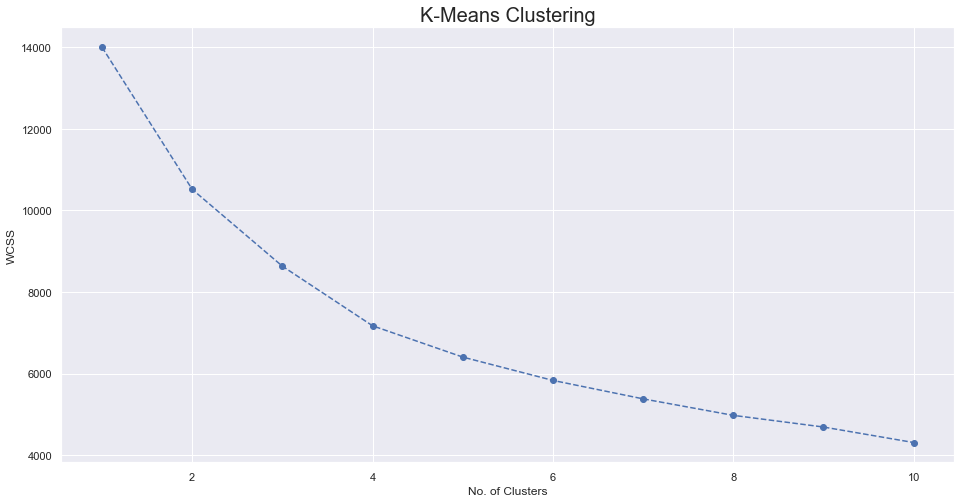

In [10]:
#Plotting wcss and no. of clusters to use elbow method 
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss,marker ='o',  linestyle='--')
plt.xlabel ('No. of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering',fontsize=20);

### So from elbow method we can see that the perfect clusters no is 4

In [11]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)

In [12]:
kmeans.fit(segmentation_strd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

# Result

In [13]:
# Creating another copy from the original Dataframe
df_seg_kmeans = df_segmentation.copy()
df_seg_kmeans['Segment_kmeans'] = kmeans.labels_
df_seg_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment_kmeans
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2


In [14]:
# Defining the segments by getting the mean of each feature
df_seg_analysis = df_seg_kmeans.groupby(['Segment_kmeans']).mean()
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment_kmeans,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [15]:
# Assign the Number of observations to Observation no column
df_seg_analysis['Observation_No'] = df_seg_kmeans [['Segment_kmeans','Age']].groupby(['Segment_kmeans']).count()

In [16]:
# Assigning the proportion of observations to proportion column 
df_seg_analysis['Proportion'] = df_seg_analysis['Observation_No'] / df_seg_analysis['Observation_No'].sum()

In [17]:
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Observation_No,Proportion
Segment_kmeans,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [59]:
# Renaming the Clusters
df_seg_analysis.rename({0:'Well_off',1:'Fewer_opportunity',2:'career_focused',3:'standard'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Observation_No,Proportion
Segment_kmeans,,,,,,,,,
Well_off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Fewer_opportunity,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
career_focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [60]:
df_seg_kmeans['Labels'] = df_seg_kmeans['Segment_kmeans'].map({0:'Well_off',
                                                                1:'Fewer_opportunity',
                                                                2:'career_focused',
                                                                3:'standard'})

In [61]:
df_seg_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment_kmeans,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,Well_off
100000002,1,1,22,1,150773,1,2,3,standard
100000003,0,0,49,1,89210,0,0,1,Fewer_opportunity
100000004,0,0,45,1,171565,1,1,2,career_focused
100000005,0,0,53,1,149031,1,1,2,career_focused
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,Fewer_opportunity
100001997,1,1,27,1,117744,1,0,3,standard
100001998,0,0,31,0,86400,0,0,1,Fewer_opportunity


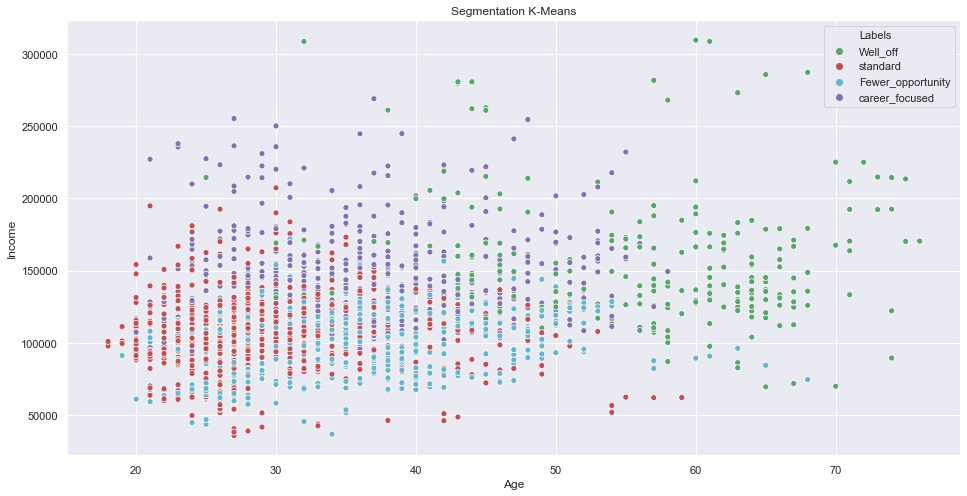

In [62]:
# plotting the raw data with the new named segments by k means 
plt.figure(figsize=(16,8))
x = df_seg_kmeans['Age']
y = df_seg_kmeans['Income']
sns.scatterplot(x,y,hue=df_seg_kmeans['Labels'], palette = ['g','r','c','m'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Segmentation K-Means');

# PCA

In [24]:
pca = PCA()

In [25]:
pca.fit(segmentation_strd)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

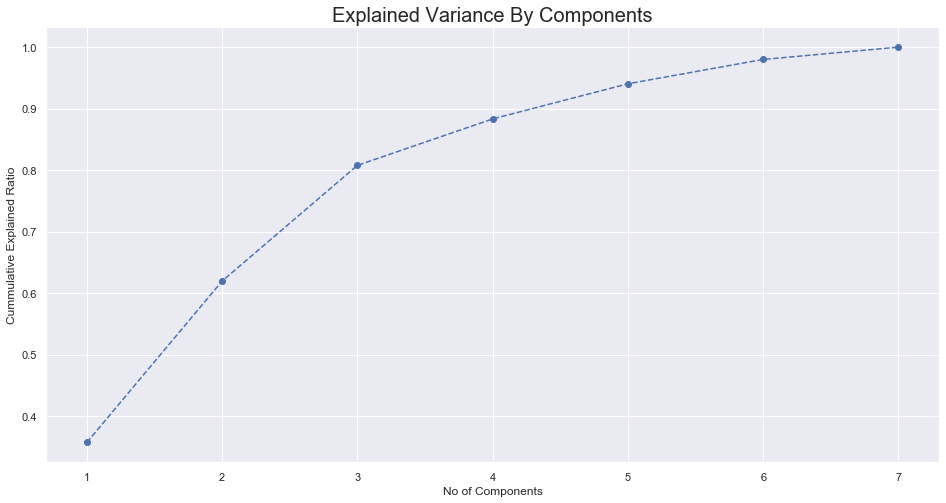

In [27]:
plt.figure(figsize=(16,8))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance By Components',fontsize = 20)
plt.xlabel('No of Components')
plt.ylabel('Cummulative Explained Ratio');

### We will reseve 80% of the data by choosing 3 components 

In [ ]:
# Note: after choosing 3 components to work with we will fit the model again 

In [28]:
pca = PCA(n_components = 3)
pca.fit(segmentation_strd)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [30]:
df_pca = pd.DataFrame(data=pca.components_,columns = df_segmentation.columns.values,index=['Component 1',
                                                                                    'Component 2','Component 3'])

In [31]:
df_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


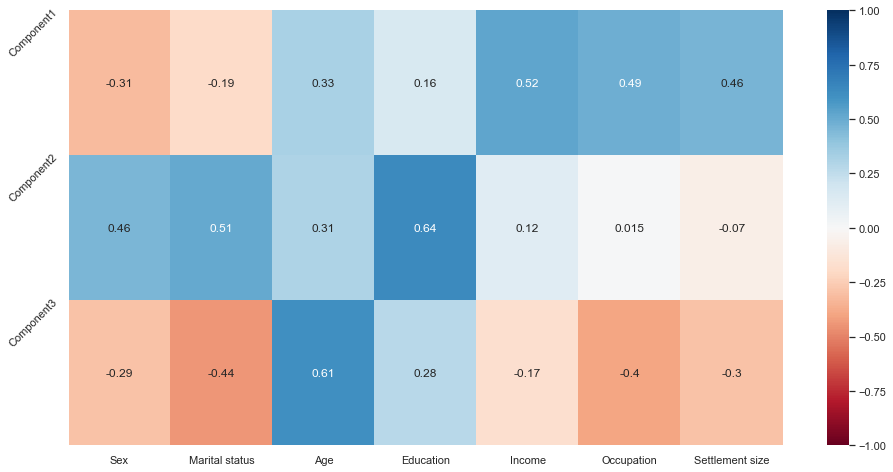

In [32]:
plt.figure(figsize=(16,8))
sns.heatmap(df_pca,vmin=-1,vmax=1,cmap='RdBu', annot=True)
plt.yticks([0,1,2],['Component1','Component2','Component3'],rotation=45);

### Component 1 : represent high corr income and occupation may represent Career
### Component 2 : represent high corr Education and Marital status Educational and Life Style
### Component 3 : represent high corr Age may represent Experience

In [33]:
scores_pca = pca.transform(segmentation_strd)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

#### Now we will apply the k means clustring one more time after applying PCA to the data 

In [34]:
wcss = [] # within cluster sum of squares 
for i in range (1,11):
    kmeans_pca = KMeans(n_clusters=i,init='k-means++',random_state=42) # k means++ is algorithms to find the best starting points for centroids
    kmeans_pca.fit(scores_pca) # I used scores pca instead of the segmentation_strd which is normalized in nature
    wcss.append(kmeans_pca.inertia_)# Inertia is attribute belong to WCSS

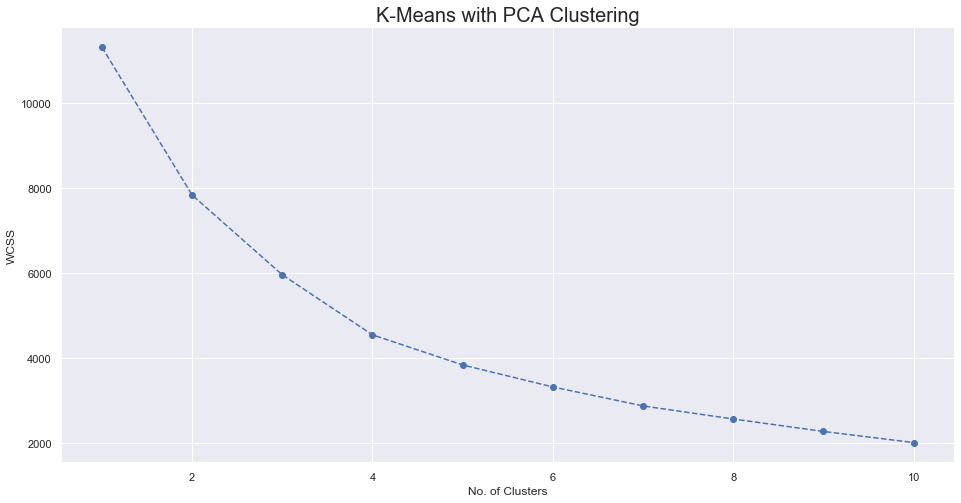

In [35]:
#Plotting wcss PCA and no. of clusters to use elbow method 
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss,marker ='o',  linestyle='--')
plt.xlabel ('No. of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means with PCA Clustering',fontsize=20);

### We got the same results as before applying PCA, so we will use 4 clusters in this segmentation

In [36]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++',random_state=42)

In [37]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

# K-Means Clustring with PCA

In [38]:
df_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_pca_kmeans.columns.values[-3:] = ['compponent1','compponent2','compponent3']
df_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [58]:
df_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,compponent1,compponent2,compponent3,Segment K-means PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0,Well-Off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2,career_focused
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1,Fewer-oppurtunity
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3,standard
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3,standard
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1,Fewer-oppurtunity
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2,career_focused
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1,Fewer-oppurtunity
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2,career_focused


In [63]:
df_pca_kmeans_freq = df_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,compponent1,compponent2,compponent3
Segment K-means PCA,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


In [82]:
df_pca_kmeans_freq.rename({0:'Well-Off',1:'Fewer-oppurtunity',2:'standard',3:'career_focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,compponent1,compponent2,compponent3,Observation_No,Proportion
Segment K-means PCA,,,,,,,,,,,,
Well-Off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
Fewer-oppurtunity,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
standard,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
career_focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [83]:
# Assign the Number of observations to Observation no column
df_pca_kmeans_freq['Observation_No'] = df_pca_kmeans [['Segment K-means PCA','Age']].groupby(['Segment K-means PCA']).count()

In [84]:
# Assigning the proportion of observations to proportion column 
df_pca_kmeans_freq['Proportion'] = df_pca_kmeans_freq['Observation_No'] / df_pca_kmeans_freq['Observation_No'].sum()

In [80]:
#Rename the clusters 
df_pca_kmeans_freq=df_pca_kmeans_freq.rename({0:'Well-Off',
                                              1:'Fewer-oppurtunity',
                                              2:'standard',3:'career_focused'})

In [85]:
df_pca_kmeans['Legend'] = df_pca_kmeans['Segment K-means PCA'].map({0:'Well-Off',
                                              1:'Fewer-oppurtunity',
                                              2:'standard',3:'career_focused'})

In [86]:
df_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,compponent1,compponent2,compponent3,Segment K-means PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0,Well-Off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1,Fewer-oppurtunity
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3,career_focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3,career_focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1,Fewer-oppurtunity
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1,Fewer-oppurtunity
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2,standard


Text(0.5, 1.0, 'Clusters By PCA Components')

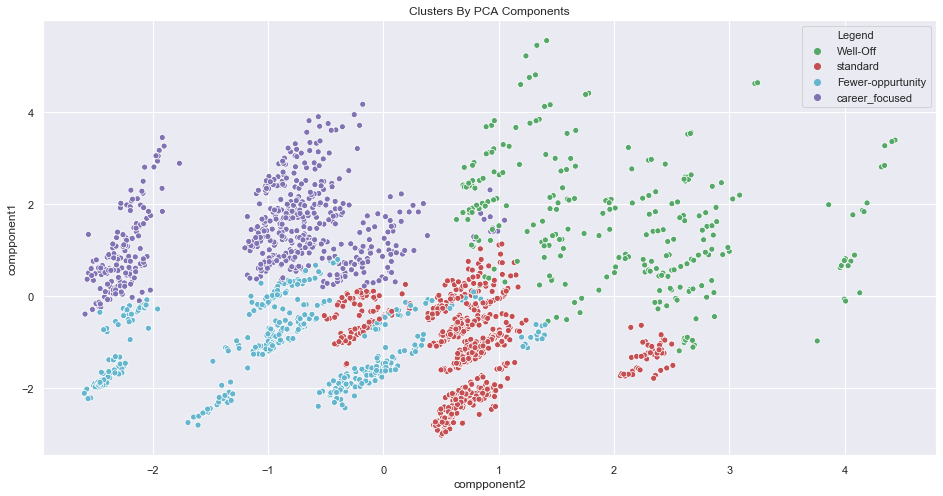

In [87]:
# Plotting two components together to show which components are most valiable
plt.figure(figsize=(16,8))
y = df_pca_kmeans['compponent1']
x = df_pca_kmeans['compponent2']
sns.scatterplot(x,y,hue=df_pca_kmeans['Legend'],palette=['g','r','c','m'])
plt.title('Clusters By PCA Components')

Text(0.5, 1.0, 'Clusters By PCA Components')

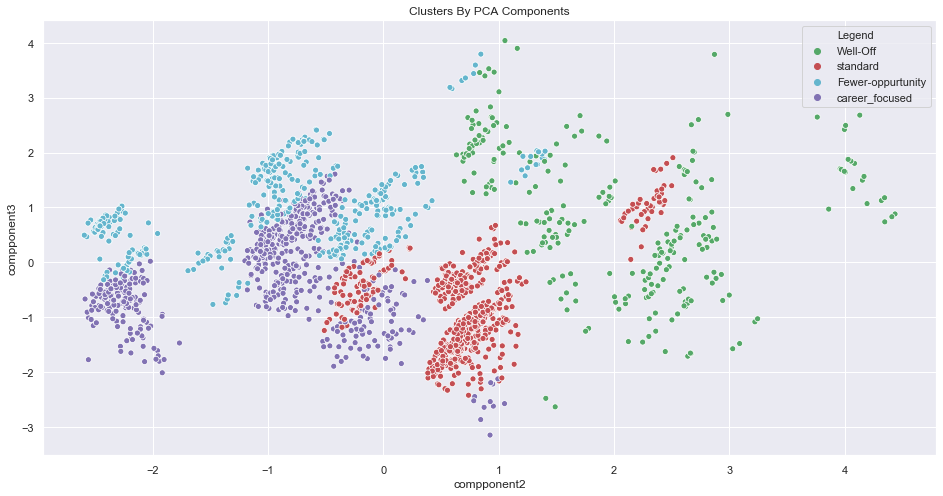

In [88]:
plt.figure(figsize=(16,8))
y = df_pca_kmeans['compponent3']
x = df_pca_kmeans['compponent2']
sns.scatterplot(x,y,hue=df_pca_kmeans['Legend'],palette=['g','r','c','m'])
plt.title('Clusters By PCA Components')

Text(0.5, 1.0, 'Clusters By PCA Components')

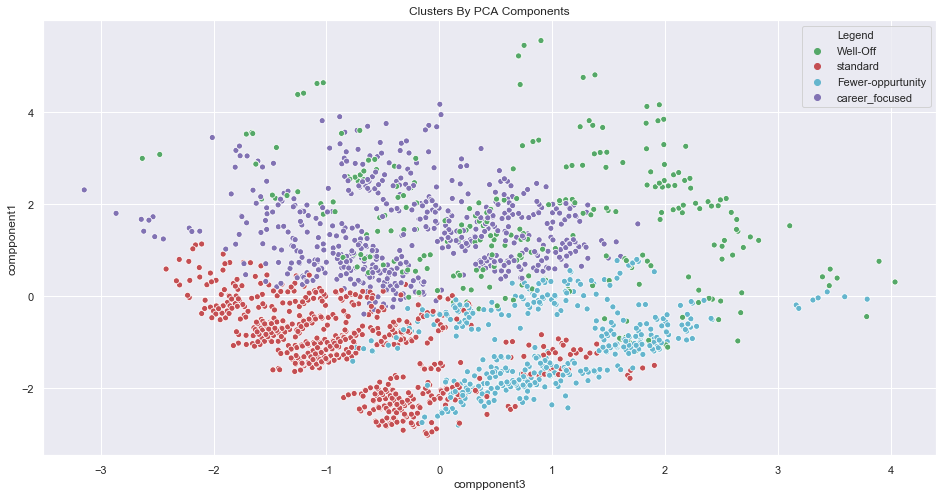

In [89]:
plt.figure(figsize=(16,8))
y = df_pca_kmeans['compponent1']
x = df_pca_kmeans['compponent3']
sns.scatterplot(x,y,hue=df_pca_kmeans['Legend'],palette=['g','r','c','m'])
plt.title('Clusters By PCA Components')

### Obviously Components 1 & 2 are the best compenents to work with in segmentation process 

# Saving 

In [90]:
pickle.dump(scaler,open('scaler.pickle','wb'))

In [91]:
pickle.dump(pca,open('pca.pickle','wb'))

In [92]:
pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))